In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
import re

In [2]:
training_data = 'adult-training.csv'
test_data = 'adult-test.csv'
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']
train=pd.read_csv(training_data, names=columns)
test=pd.read_csv(test_data, names=columns)

In [3]:
# defining function for estimating missing values in each columns
def missing_value(df):
    miss=[]
    col_list=df.columns
    for i in col_list:
        missing=df[i].isnull().sum()
        miss.append(missing)
        list_of_missing=pd.DataFrame(list(zip(col_list,miss)))
    return list_of_missing

In [4]:
missing_value(test)
missing_value(train)

,0,1
0,Age,0
1,Workclass,0
2,fnlgwt,0
3,Education,0
4,Education Num,0
5,Marital Status,0
6,Occupation,0
7,Relationship,0
8,Race,0
9,Sex,0


In [55]:
import matplotlib.pyplot as plt

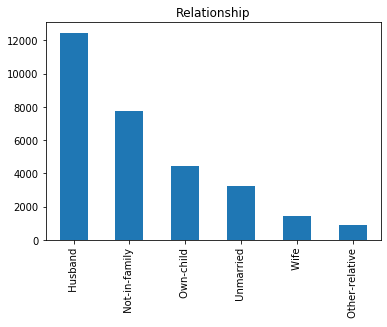

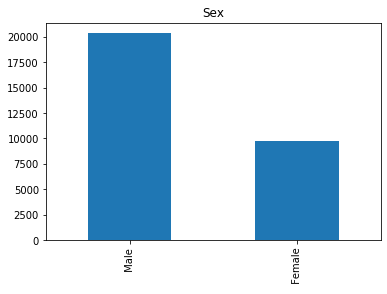

KeyboardInterrupt: 

In [ ]:
for column in train.columns:
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", title=column)
    else:
        train[column].hist()
        plt.title(column)
    plt.show()

In [5]:
train.Relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [6]:
test.Occupation.value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: Occupation, dtype: int64

In [7]:
print(test.shape)
print(train.shape)

test.drop(test.index[0]).head()
train.drop(train.index[0]).head()

(16282, 15)
(32561, 15)


,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
#Separate columns into separate string and numerical lists
all_data=[train, test]
str_list=[]

for data in all_data:
    for colname, colvalue in data.iteritems(): 
        if type(colvalue[1]) == str:
            str_list.append(colname) 
num_list = data.columns.difference(str_list)

In [9]:
print(test.isnull().sum())

Age                0
Workclass          1
fnlgwt             1
Education          1
Education Num      1
Marital Status     1
Occupation         1
Relationship       1
Race               1
Sex                1
Capital Gain       1
Capital Loss       1
Hours/Week         1
Country            1
Above/Below 50K    1
dtype: int64


In [10]:
#Currently our data displays the "?" character for null values.
#We want to replace that special character to NaN
for data in all_data:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True)
    data.dropna(inplace=True)

In [11]:
test.isnull().sum()

Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50K    0
dtype: int64

In [12]:
#Define our target variable
for data in all_data:
    data['target']=data['Above/Below 50K'].apply(lambda x: x.replace('.', ''))
    data['target']=data['target'].apply(lambda x: x.strip())
    data['target']=data['target'].apply(lambda x: 1 if x=='>50K' else 0)
    data.drop(['Above/Below 50K'], axis=1, inplace=True)

In [13]:
train.target.sum()/len(train)

0.24892248524633645

In [14]:
#Education and Hours/Week appear to be reliable variables to predict income.
#We will bin our education data into Low, Medium, and High education ranges.
#Education can be divided into three groups: 0-6 low and 7-11 medium and above that high

In [15]:
#data can be train or test
#var is variable name: should be passed as strings within ('')
# bins is list of numeric values
# group names is the groups you want to create in list form
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(train[var], bin_value, labels=group)

In [16]:
bin_var(train, 'Education Num', [0,6,11,16], ['Low', 'Medium', 'High'])
bin_var(test, 'Education Num', [0,6,11,16], ['Low', 'Medium', 'High'])

In [17]:
pd.crosstab(train['Education NumCat'],train['target'] )

target,0,1
Education NumCat,,
Low,2179,137
Medium,15865,3385
High,4610,3986


In [18]:
#Similarly, we can bin our Hours/Week variable

In [19]:
bin_var(train, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
bin_var(test, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

In [20]:
pd.crosstab(train['Hours/WeekCat'],train['target'], margins=True)

target,0,1,All
Hours/WeekCat,,,
Low,5369,505,15091
Medium,11829,3262,5874
High,4796,3349,8145
VeryHigh,660,392,1052
All,22654,7508,30162


In [21]:
#We can classify our Occupation variable by skill level

In [22]:
occu=pd.crosstab(train['Occupation'],train['target'], margins=True).reset_index()

In [23]:
def occup(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'

In [24]:
train['Occupa_cat']=train.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))
test['Occupa_cat']=test.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))

In [25]:
train['Occupa_cat'].value_counts()

Lowskill     22132
Highskill     8030
Name: Occupa_cat, dtype: int64

In [26]:
#We can also bin our Age variable into relevant groups.

In [27]:
bin_var(test, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

In [28]:
bin_var(train, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

In [29]:
#Marital status can be grouped  by status.

In [30]:
train['Marital Status_cat']=train['Marital Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')
test['Marital Status_cat']=test['Marital Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')

In [31]:
#Race can be binned as well

In [32]:
pd.crosstab(train['Race'],train['target'], margins=True)

target,0,1,All
Race,,,
Amer-Indian-Eskimo,252,34,286
Asian-Pac-Islander,647,248,895
Black,2451,366,2817
Other,210,21,231
White,19094,6839,25933
All,22654,7508,30162


In [33]:
train['Race_cat']=train['Race'].apply(lambda x: x.strip())
train['Race_cat']=train['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')
test['Race_cat']=test['Race'].apply(lambda x: x.strip())
test['Race_cat']=test['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')

In [34]:
#We can further reduce the Workclass variable into a few distinct groups: Private, Selfemployed, Government, and others
train.Workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

In [35]:
def workclas(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'

In [36]:
train['WorfClass_cat']=train.Workclass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))
test['WorfClass_cat']=test.Workclass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))

In [37]:
train['WorfClass_cat'].value_counts()

Private     22286
gov          4289
selfempl     3573
others         14
Name: WorfClass_cat, dtype: int64

In [38]:
# assigning the target to Y variable
Y_tr=train['target']
Y_te=test['target']

In [39]:
# since target is already assigned I Will drop the target from the train and test along with other unnecessary variables
train.drop(['Education','Occupation','Race','Education Num','Age', 'Hours/Week', 'Marital Status','target','fnlgwt','Workclass', 'Capital Gain','Capital Loss', 'Country'], axis=1, inplace=True)
test.drop(['Education','Occupation','Race','Education Num','Age', 'Hours/Week', 'Marital Status','Workclass','target','fnlgwt', 'Capital Gain','Capital Loss', 'Country'], axis=1, inplace=True)

In [40]:
str_list=['WorfClass_cat','Education NumCat', 'AgeCat', 'Race_cat',
'Hours/WeekCat',
 'Marital Status_cat',
 'Occupa_cat',
 'Relationship',
 'Sex']

train_set=pd.get_dummies(train, columns=str_list)
test_set=pd.get_dummies(test, columns=str_list)

Feature Selection Using Variance Threshold

In [41]:
train_set.columns

Index(['WorfClass_cat_Private', 'WorfClass_cat_gov', 'WorfClass_cat_others',
       'WorfClass_cat_selfempl', 'Education NumCat_Low',
       'Education NumCat_Medium', 'Education NumCat_High', 'AgeCat_Young',
       'AgeCat_Middle_aged', 'AgeCat_Old', 'Race_cat_Other', 'Race_cat_White',
       'Hours/WeekCat_Low', 'Hours/WeekCat_Medium', 'Hours/WeekCat_High',
       'Hours/WeekCat_VeryHigh', 'Marital Status_cat_Single',
       'Marital Status_cat_married', 'Occupa_cat_Highskill',
       'Occupa_cat_Lowskill', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Sex_ Female', 'Sex_ Male'],
      dtype='object')

In [42]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_select(df, thresh=0.0, na_replacement=-999):
    df1 = df.copy(deep=True)
    selector = VarianceThreshold(thresh)
    selector.fit(df1.fillna(na_replacement))
    df2 = df.loc[:,selector.get_support(indices=False)]
    return df2

In [43]:
df2=variance_threshold_select(train_set, thresh=.8* (1 - .8))

In [44]:
print(df2.columns)

Index(['WorfClass_cat_Private', 'Education NumCat_Medium',
       'Education NumCat_High', 'AgeCat_Young', 'AgeCat_Middle_aged',
       'Hours/WeekCat_Medium', 'Hours/WeekCat_High',
       'Marital Status_cat_Single', 'Marital Status_cat_married',
       'Occupa_cat_Highskill', 'Occupa_cat_Lowskill', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Sex_ Female', 'Sex_ Male'],
      dtype='object')


In [45]:
col_tr=df2.columns # creates a list of columns
col_te=test_set.columns # creates a list of columns for test
X_tr=df2.values # creates an array of values of features
X_te=test_set[col_tr].values #subsetts the test dataset to get the same variable as train

In [46]:
len(col_tr)

15

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import itertools

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
#    else:
#        print('Confusion matrix, without normalization')

#    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


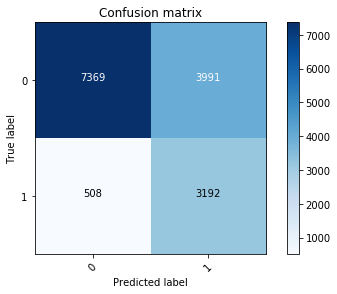

Precision =     0.444
Recall (TPR) =  0.863
Fallout (FPR) = 3.513e-01


In [49]:
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_tr, Y_tr)
y_pred = lrn.predict(X_te)
cm = confusion_matrix(Y_te, y_pred)
if lrn.classes_[0] == 1:
    cm = np.array([[cm[1,1], cm[1,0]], [cm[0,1], cm[0,0]]])

plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

In [50]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    
print ('Accuracy:', accuracy_score(Y_te, y_pred))
print ('F1 score:', f1_score(Y_te,y_pred))

Accuracy: 0.701261620185923
F1 score: 0.5866029587429936


In [51]:
coff=pd.DataFrame(lrn.coef_).T 
col=pd.DataFrame(col_tr).T 
print(coff)
print(col)

           0
0   0.000000
1   0.000000
2   0.560563
3  -0.275866
4   0.000926
5   0.000000
6   0.078799
7  -0.864575
8   0.652150
9   0.000000
10 -0.365108
11  0.000000
12  0.000000
13  0.000000
14  0.000000
                      0                        1                      2   \
0  WorfClass_cat_Private  Education NumCat_Medium  Education NumCat_High   

             3                   4                     5                   6   \
0  AgeCat_Young  AgeCat_Middle_aged  Hours/WeekCat_Medium  Hours/WeekCat_High   

                          7                           8   \
0  Marital Status_cat_Single  Marital Status_cat_married   

                     9                    10                     11  \
0  Occupa_cat_Highskill  Occupa_cat_Lowskill  Relationship_ Husband   

                            12           13         14  
0  Relationship_ Not-in-family  Sex_ Female  Sex_ Male  
